In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
batch_size = 20

In [3]:
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


In [4]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input


In [6]:
train_data = np.load('../data/train_data.npz')
X_train, y_train = preprocess_input(train_data['images']), train_data['labels']

In [11]:
_input = Input(shape=(224, 224, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor = _input)

for idx, layer in vgg16.layers_by_depth.items():
    if idx in [1, 2, 3]:
        layer[0].trainable = True
    else:
        layer[0].trainable = False
        
_layer2 = Flatten()(vgg16.output)
_layer3 = Dense(200, activation='relu')(_layer2)
_output = Dense(1, activation='sigmoid')(_layer3)

model = Model(inputs=[_input], outputs=[_output])
optimizer = Adam(lr=0.00025)
model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
from keras.callbacks import ReduceLROnPlateau

lrdecay = ReduceLROnPlateau(patience=5)

results = model.fit(X_train, y_train, epochs=50,
                    batch_size=20, validation_split=0.2,
                    callbacks=[lrdecay]
                   )

Train on 1836 samples, validate on 459 samples
Epoch 1/50
1836/1836 [==============================] - 105s - loss: 0.4335 - acc: 0.8693 - val_loss: 0.3466 - val_acc: 0.8344
Epoch 2/50
1836/1836 [==============================] - 104s - loss: 0.2253 - acc: 0.9188 - val_loss: 0.1110 - val_acc: 0.9586
Epoch 3/50
1836/1836 [==============================] - 104s - loss: 0.1587 - acc: 0.9499 - val_loss: 0.2033 - val_acc: 0.9325
Epoch 4/50
1836/1836 [==============================] - 104s - loss: 0.0848 - acc: 0.9733 - val_loss: 0.2077 - val_acc: 0.9455
Epoch 5/50
1836/1836 [==============================] - 104s - loss: 0.1024 - acc: 0.9722 - val_loss: 0.2252 - val_acc: 0.9412
Epoch 6/50
1836/1836 [==============================] - 104s - loss: 0.0654 - acc: 0.9777 - val_loss: 0.1880 - val_acc: 0.9259
Epoch 7/50
1836/1836 [==============================] - 104s - loss: 0.1484 - acc: 0.9532 - val_loss: 0.2555 - val_acc: 0.9434
Epoch 8/50
1836/1836 [==============================] - 104s - l

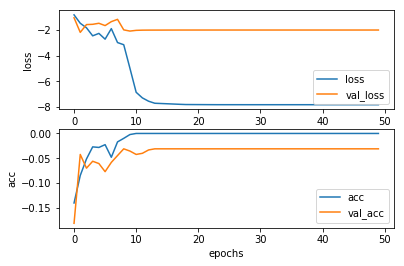

In [13]:
from matplotlib import pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(results.epoch, np.log(results.history['loss']), label='loss')
plt.plot(results.epoch, np.log(results.history['val_loss']), label='val_loss')
plt.ylabel('loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(results.epoch, np.log(results.history['acc']), label='acc')
plt.plot(results.epoch, np.log(results.history['val_acc']), label='val_acc')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()